In [1]:
import sys
sys.path.append('../../../src')
from helpers import *
import scipy.stats as st
import random
random.seed(12345)
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### Import data, summarise quantification

In [2]:
df = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/NEBD_Embryos_dataframe.csv')
df_quantification = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/QUANTIFICATION.csv')
df_quantification_grouped = df_quantification.groupby('EmbryoID')

df_summary = pd.DataFrame()
for i, r in df_quantification_grouped:
    cyt = np.mean(r['Cytoplasmic signal'])
    mem_tot = np.mean(r['Membrane signal'])
    mem_ant = bounded_mean_1d(r['Membrane signal'], [0.4, 0.6])
    mem_post = bounded_mean_1d(r['Membrane signal'], [0.9, 0.1]) 
    p = {'EmbryoID': i, 'Cyt': cyt, 'Mem_tot': mem_tot, 'Mem_ant': mem_ant, 'Mem_post': mem_post} 
    df_summary = df_summary.append(pd.DataFrame(p, index=[i]))
df = pd.merge(df, df_summary, on='EmbryoID')

# Filter
df = df[df.Line.isin(['lp637', 'nwg201', 'nwg240', 'nwg246', 'nwg338', 'nwg369', 'nwg376', 'nwg437'])]

# # Remove points below threshold
# mem_thresh = 4e2
# cyt_thresh = 2e2
# df = df[df.Mem_post > mem_thresh]
# df = df[df.Cyt > cyt_thresh]

# Add uniform vs polarised column
unipol = ['Pol' if x in ['lp637', 'nwg240', 'nwg338', 'nwg376'] else 'Uni' for x in df.Line]
df['UniPol'] = unipol

# Add genotype column
genotype = ['WT' if x in ['lp637', 'nwg201'] else 'C56S' if x in ['nwg240', 'nwg246'] else 'L109R' if x in ['nwg338', 'nwg369'] else 'GCN4' for x in df.Line]
df['Genotype'] = genotype

df

,Unnamed: 0,Path,EmbryoID,Line,Date,RNAi,Cyt,Mem_tot,Mem_ant,Mem_post,UniPol,Genotype
0,0,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292350,lp637,200129,wt,1905.8176,21047.143487,-382.695087,49073.503577,Pol,WT
1,1,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292382,lp637,200129,wt,1773.6985,20085.180602,-457.248027,48638.710274,Pol,WT
2,2,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292449,lp637,200129,wt,1747.8225,19632.492686,-484.477064,47666.740255,Pol,WT
3,3,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292501,lp637,200129,wt,1750.2806,19798.174942,-502.926717,47007.759740,Pol,WT
4,4,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292520,lp637,200129,wt,1738.4486,19679.500001,-505.556864,46303.485250,Pol,WT
...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662143752,nwg376,220902,2209020830par2,1338.8955,5355.256417,2180.890391,8556.466376,Pol,GCN4
656,656,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662143805,nwg376,220902,2209020830par2,1750.6221,7644.888390,954.015322,13136.051434,Pol,GCN4
657,657,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662143923,nwg338,220902,2209020830par2,2488.3710,4244.196745,-53.258576,12125.048948,Pol,L109R
658,658,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662143984,nwg338,220902,2209020830par2,2147.0781,2992.826677,122.387464,8037.867513,Pol,L109R


### Plotting

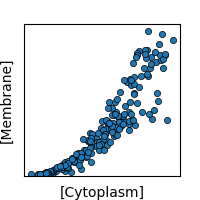

In [3]:
fig, ax = plt.subplots()
# xdata = df[df.Genotype == 'C56S']['Cyt']
# ydata = df[df.Genotype == 'C56S']['Mem_post']
# ax.scatter(xdata, ydata, color='tab:orange', edgecolors='k', linewidth=1, s=20)
xdata = df[df.Genotype == 'WT']['Cyt']
ydata = df[df.Genotype == 'WT']['Mem_post']
ax.scatter(xdata, ydata, color='tab:blue', edgecolors='k', linewidth=0.5, s=20)
ax.tick_params(axis='both', labelsize=8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('[Cytoplasm]')
ax.set_ylabel('[Membrane]')
fig.set_size_inches(2,2)
fig.subplots_adjust(bottom=0.12, left=0.12)
fig.savefig('Figs/rundown_data_linear.png', dpi=600, transparent=True)

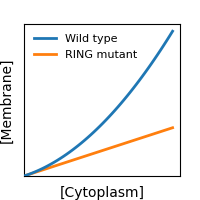

In [4]:
fig, ax = plt.subplots()
xdata = np.linspace(0, 1)
ydata = xdata ** 2 + 0.5 * xdata
ax.plot(xdata, ydata, color='tab:blue', linewidth=2, label='Wild type', zorder=100)
xdata = np.linspace(0, 1)
ydata = 0.5 * xdata
ax.plot(xdata, ydata, color='tab:orange', linewidth=2, label='RING mutant')
ax.tick_params(axis='both', labelsize=8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('[Cytoplasm]')
ax.set_ylabel('[Membrane]')
ax.legend(frameon=False, fontsize=8)
fig.set_size_inches(2,2)
fig.subplots_adjust(bottom=0.12, left=0.12)
fig.savefig('Figs/rundown_schematic_wt_mutant.png', dpi=600, transparent=True)